# LEKCE 2 -- opakovani doma

### import packages for data and numeric math:

In [1]:
import pandas as pd
import numpy as np

### import packages for plotting:

In [2]:
import matplotlib.pyplot as plt #plots

### import packages for styling and plotting:

In [3]:
import seaborn as sns #styling

### read data:

In [4]:
df = pd.read_csv("./in/tables/test.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Obdoba WHERE clause je iloc:

In [5]:
def high_spenders(df, threshold: int):
    """Returns all the customers that have a Spending score greater than provided threshold"""
    return df.loc[df["Spending_Score_1_100"] > threshold]

In [6]:
high_spenders(df, 70).head()

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1_100
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


### korelacni matice:

In [7]:
corr = df.corr(numeric_only=True)
corr

,CustomerID,Age,Annual_Income_k,Spending_Score_1_100
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_k,0.977548,-0.012398,1.000000,0.009903
Spending_Score_1_100,0.013835,-0.327227,0.009903,1.000000


In [8]:
def plot_heatmap_return(corr):
    """vraci matplotLIBOVEJ object axes"""
    plt.figure(figsize=(10,8))
    return sns.heatmap(corr, annot=True, cmap = 'coolwarm', center = 0)

def plot_heatmap(corr_matrix):
    """rovnou naploti heatmapu korelacni matice"""
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

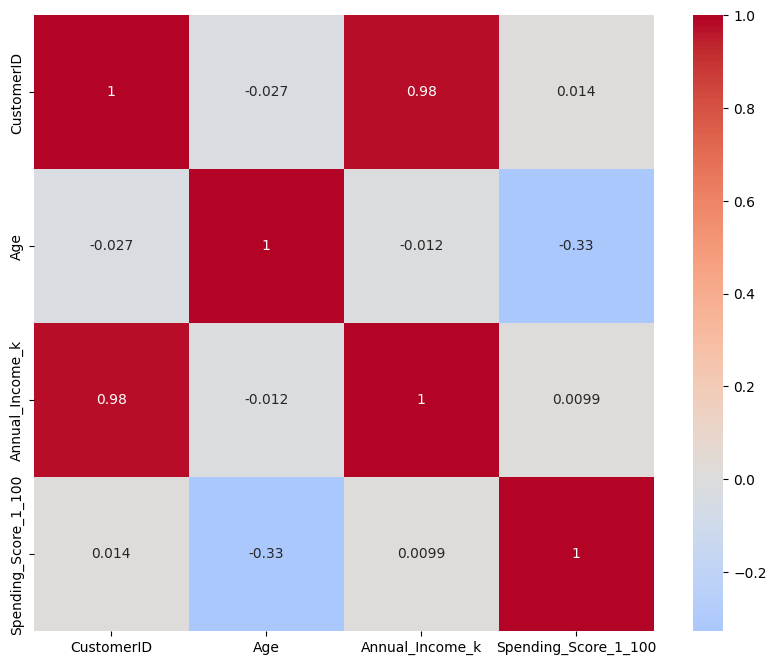

In [9]:
plot_heatmap(corr)

In [10]:
def anonymize_column(df, column_name):
    """multiplies a selected column by a list of random numbers and returns the datarfame with both columns"""
    df["anonymized_column"] = df[column_name]*np.random.rand(len(df))
    return df

In [11]:
anonymize_column(df, "CustomerID")

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1_100,anonymized_column
0,1,Male,19,15,39,0.939576
1,2,Male,21,15,81,0.898233
2,3,Female,20,16,6,0.639635
3,4,Female,23,16,77,0.507101
4,5,Female,31,17,40,0.611691
...,...,...,...,...,...,...
195,196,Female,35,120,79,109.796282
196,197,Female,45,126,28,135.632136
197,198,Male,32,126,74,1.486461
198,199,Male,32,137,18,168.784738


In [12]:
def get_statistics(df, column_name):
    """Returns statistical data about the data set in the provided dataframe and selected column."""
    return {
        "mean":df[column_name].mean(),
        "median":df[column_name].median(),
        "standard deviation":df[column_name].std(),
        "min":df[column_name].min(),
        "max":df[column_name].max()
    }

In [13]:
get_statistics(df, "Spending_Score_1_100")

{'mean': 50.2,
 'median': 50.0,
 'standard deviation': 25.823521668370173,
 'min': 1,
 'max': 99}

In [14]:
get_statistics(df, "Spending_Score_1_100")["median"]

50.0

## nabinovat data:

In [15]:
def bin_the_data(data, column_name, binned_column_name, N_bins):
    """Takes the data (in the dataframe form) and bins the selected column 'column_name' into the selected amount of bins 'N_bins' and stores the bins in the 'binned_column_name' -- returns the whole dataframe"""
    data[binned_column_name] = pd.qcut(data[column_name], N_bins, labels=False)
    return data

In [16]:
bin_the_data(df, "Age", "Age_bin", 10)
df

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1_100,anonymized_column,Age_bin
0,1,Male,19,15,39,0.939576,0
1,2,Male,21,15,81,0.898233,0
2,3,Female,20,16,6,0.639635,0
3,4,Female,23,16,77,0.507101,1
4,5,Female,31,17,40,0.611691,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,109.796282,4
196,197,Female,45,126,28,135.632136,6
197,198,Male,32,126,74,1.486461,3
198,199,Male,32,137,18,168.784738,3


# DOMACAK:
1) nabinovat si Age a naplotit prumerne spending score pro kazdou vekovou grupu
2) vytvorit segmenty kombinaci dvou podsegmentu (high/low money_maker a high/low spender)
3) naplotit pocty lidi v druhem ukolu dle tohoto "kombosegmentu"

## Jak se dela groupby:
(pekne neintuitivne -- a zrada s reset_index taky nepotesi)

In [17]:
average_SS_by_age_bin = df.groupby('Age_bin')['Spending_Score_1_100'].mean().reset_index() # BACHA -- kdyz tam nedam reset.index, tak to nebude pd.dataframe, ale pd.series a s tim se pracuje trochu hur:
# print(type(average_SS_by_age_bin))
# print(average_SS_by_age_bin.index)
# print(average_SS_by_age_bin.values)
average_SS_by_age_bin

,Age_bin,Spending_Score_1_100
0,0,49.681818
1,1,61.333333
2,2,72.136364
3,3,65.105263
4,4,54.304348
5,5,53.555556
6,6,27.142857
7,7,43.352941
8,8,31.950000
9,9,43.000000


### Naplotit to pomoci pandasu:

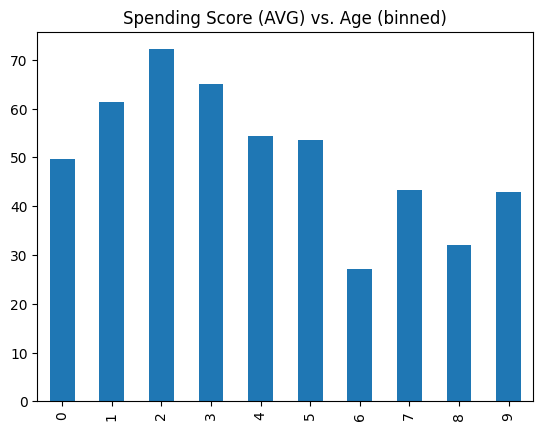

In [18]:
average_SS_by_age_bin['Spending_Score_1_100'].plot(kind="bar") # jedna se o metodu vlastni pro pd.series, tzn.: z dataframe si vemu sloupec (to je vlastne series) a na nem volam metodu plot
plt.title("Spending Score (AVG) vs. Age (binned)")
plt.show() # dalo by se pak jeste nastavovat plt.ylabel, plt.xlabel a podobne blbinky, ale keep it simple, zejo...

### Naplotit to pomoci matplotlib:

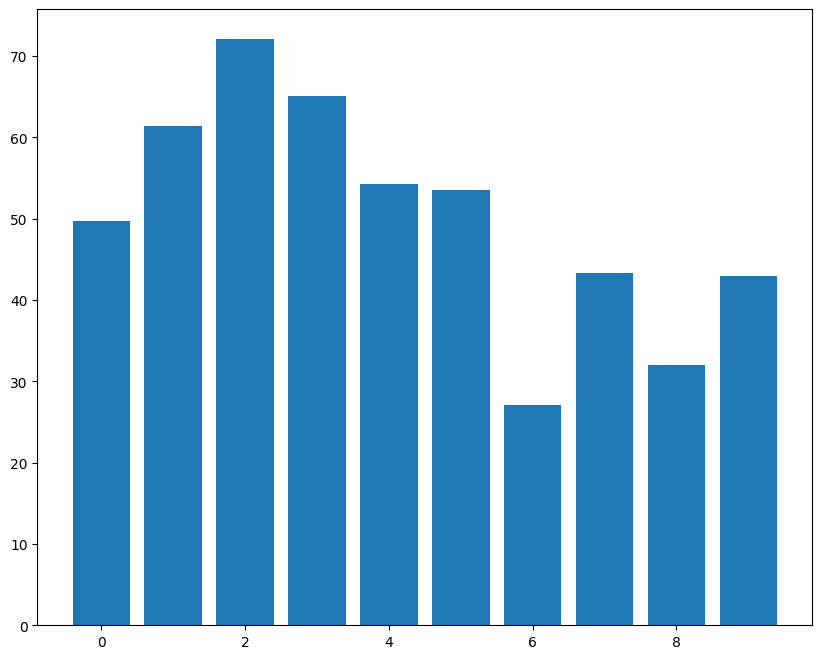

In [19]:
plt.figure(figsize=(10,8))
plt.bar(average_SS_by_age_bin["Age_bin"], average_SS_by_age_bin["Spending_Score_1_100"]) # zadam X a zadam Y -- musi byt stejne dlouhe
plt.show()  # dalo by se pak jeste nastavovat plt.ylabel, plt.xlabel a podobne blbinky, ale keep it simple, zejo...

### Naplotit pomoci seaborn:

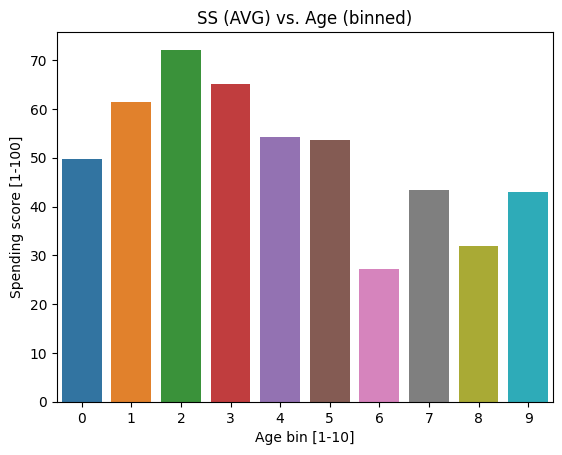

In [20]:
sns.barplot(data=average_SS_by_age_bin, x='Age_bin', y='Spending_Score_1_100')
plt.ylabel("Spending score [1-100]")
plt.xlabel("Age bin [1-10]")
plt.title("SS (AVG) vs. Age (binned)")
plt.show()

In [21]:
df["Annual_Income_k"]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual_Income_k, Length: 200, dtype: int64

### Regresni plot:
urcuje jestli je nejaka zavislost mezi annual_income a spending_score

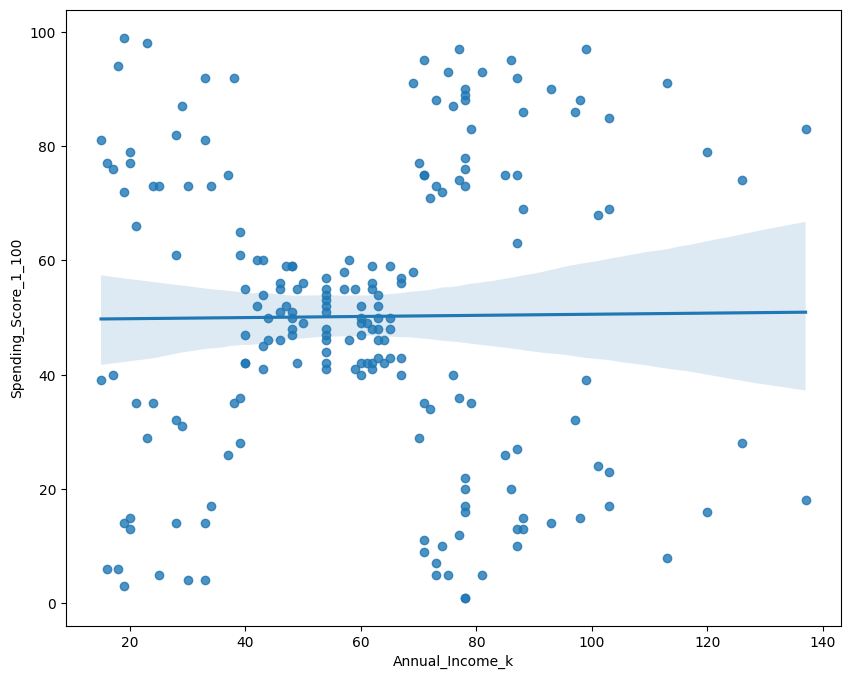

In [22]:
plt.figure(figsize=(10,8))
sns.regplot(data=df, x='Annual_Income_k', y='Spending_Score_1_100')
plt.show()

### Roztridit dle segmentu:

In [23]:
mean_of_income = get_statistics(df, "Annual_Income_k")["mean"] # tady se nam hodila nase funkce! husty... (OF ale pouziva proste hranici 50k pro prijem...)

In [24]:
df["Combined_segment"] = ''

for index, row in df.iterrows():
    if row["Annual_Income_k"] > mean_of_income and row["Spending_Score_1_100"] > 50:
        df.at[index, "Combined_segment"] = "high_income_high_spending"
    elif row["Annual_Income_k"] > mean_of_income and row["Spending_Score_1_100"] <= 50:
        df.at[index, "Combined_segment"] = "high_income_low_spending"
    elif row["Annual_Income_k"] <= mean_of_income and row["Spending_Score_1_100"] > 50:
        df.at[index, "Combined_segment"] = "low_income_high_spending"
    elif row["Annual_Income_k"] <= mean_of_income and row["Spending_Score_1_100"] <= 50:
        df.at[index, "Combined_segment"] = "low_income_low_spending"
    else:
        df.at[index, "Combined_segment"] = "non-segmentable"

### group by:

In [25]:
grouped_DF = df.groupby('Combined_segment').size().reset_index()
grouped_DF

,Combined_segment,0
0,high_income_high_spending,48
1,high_income_low_spending,54
2,low_income_high_spending,49
3,low_income_low_spending,49


### deprecated zpusoob, jak udelat to samy:
jako takhle: spocita nam to taky, ale co delat, kdyz pak bude nekde age=null?

In [26]:
df.groupby('Combined_segment').count()["Age"].reset_index()

,Combined_segment,Age
0,high_income_high_spending,48
1,high_income_low_spending,54
2,low_income_high_spending,49
3,low_income_low_spending,49


## Plotting:

### Nejzakladnejsi reseni pomoci matplotlib:

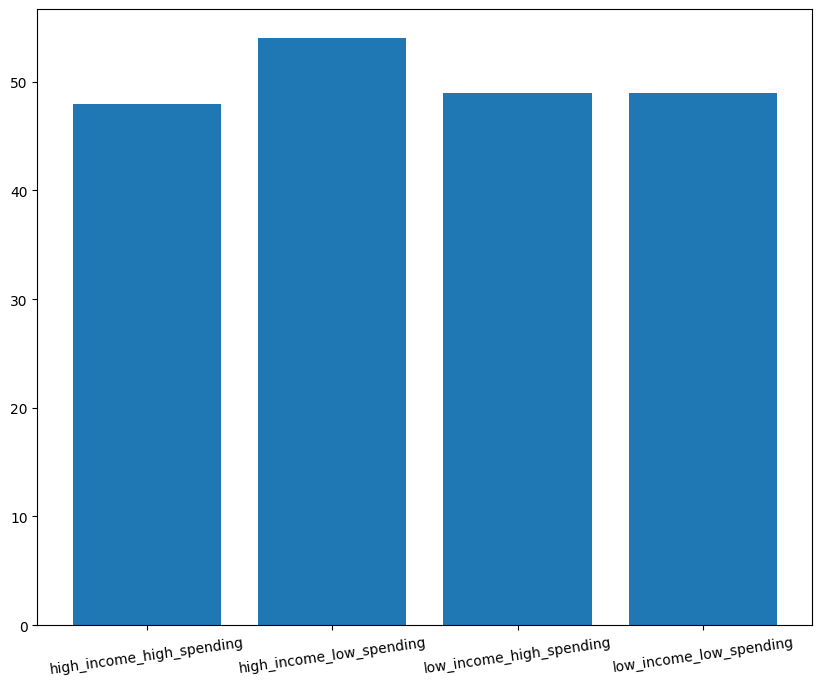

In [27]:
plt.figure(figsize=(10,8))
plt.bar(grouped_DF["Combined_segment"],grouped_DF[0])
plt.xticks(rotation = 8) # natocit popisky
plt.show()

### Pokrocilejsi reseni pomoci matplotlib (cisla nad sloupcema):

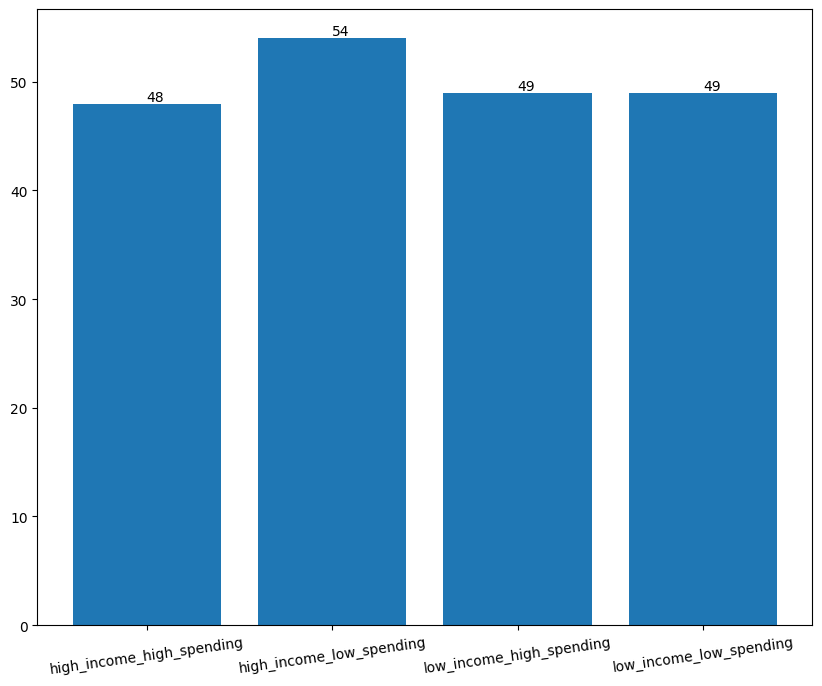

In [28]:
plt.figure(figsize=(10,8))
bars = plt.bar(grouped_DF["Combined_segment"],grouped_DF[0])
plt.xticks(rotation = 8)


# tadyhlento mi napsal chat:
# Iterate over the bars and add value labels
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va means vertical alignment

plt.show()

### Zakladni reseni pomoci seaborn:

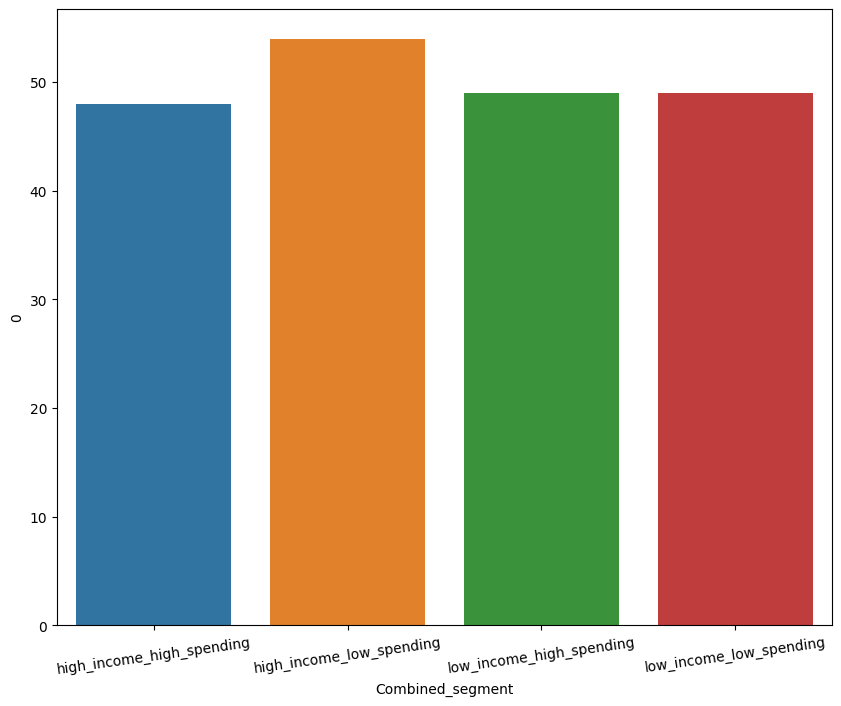

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(data=grouped_DF, x="Combined_segment" , y=0)
plt.xticks(rotation = 8)
plt.show()

In [30]:
# jeste by to slo udelat jako sns.countplot( zde se strka puvodni df bez agregace, tu si to udela samo), ale prislo mi, ze zagregovat si to mimo lip procvici znalosti z minulyho ukolu...

### Zakladni reseni v pandasu:

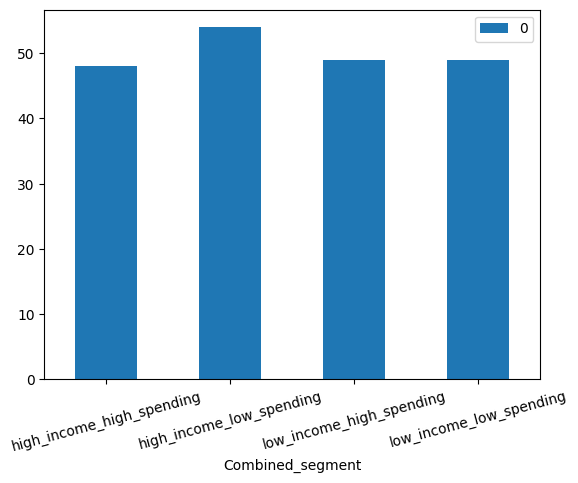

In [31]:
grouped_DF.plot(kind="bar", x = "Combined_segment", y = 0) # legendu muzu vypnout pomoci legend=False, ale keep it simple, stejne si to nebudu pamatovat...
plt.xticks(rotation = 15) # natocit popisky dat na x-ove ose
plt.show()

## Seradit sloupce sestupne a prejmenovat si sloupec v agregovanem DF:
coz nas navede na srovnatelne reseni s OF (az na to ze OF pouziva jinou mez pro prijem)

### prejmenovat:

In [32]:
grouped_DF.rename(columns={0:"count"}, inplace=True)
grouped_DF

,Combined_segment,count
0,high_income_high_spending,48
1,high_income_low_spending,54
2,low_income_high_spending,49
3,low_income_low_spending,49


### seradit:

In [33]:
grouped_DF = grouped_DF.sort_values("count", ascending=False)
grouped_DF

,Combined_segment,count
1,high_income_low_spending,54
2,low_income_high_spending,49
3,low_income_low_spending,49
0,high_income_high_spending,48


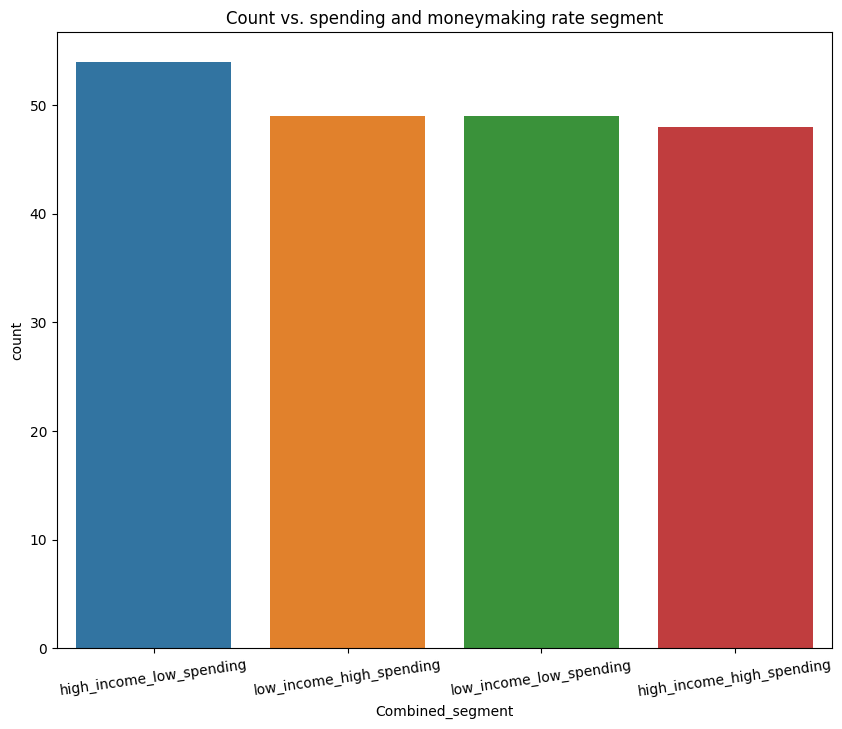

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(data=grouped_DF, x="Combined_segment", y="count")
plt.xticks(rotation = 8)
plt.title("Count vs. spending and moneymaking rate segment")
plt.show()

# [X] DOMACAK splnen 
# [X] ucivo z LEKCE zopakovano -- cas naucit se delat pekne veci:

### slidery a update grafu se sliderem -- histogram s menitelnou velicionou bin_count:

In [35]:
from ipywidgets import widgets
from IPython import display

n_bins = 5

def plot_stuff(n_bins):
    bin_the_data(df, "Age", "binned_age", n_bins)
    counts_DF = df.groupby('binned_age').size().reset_index()
    counts_DF.rename(columns={0:"counts"}, inplace=True) # pojmenuj sloupec co se ted menuje 0, "counts"
    
    plt.figure(figsize=(10,8))
    plt.bar(counts_DF["binned_age"], counts_DF["counts"])
    plt.show()

    
    
bin_slider = widgets.IntSlider(min = 1, max = 20, step = 1, value=5)
widgets.interact(plot_stuff, n_bins = bin_slider)

interactive(children=(IntSlider(value=5, description='n_bins', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_stuff(n_bins)>

In [37]:
def plot_combosegments(spend_threshold, income_threshold):
    
    df["combosegment"] = '' # zalozit novy sloupec, ktery bude prazdny
    
    for index, row in df.iterrows(): # iteruj pres radky -- vracej mi index (jako int) a i radek (jako series)
        if row["Spending_Score_1_100"] > spend_threshold and row["Annual_Income_k"] > income_threshold:
            df.at[index, "combosegment"] = "HIGH_SPENDER and HIGH_INCOME"
        elif row["Spending_Score_1_100"] > spend_threshold and row["Annual_Income_k"] <= income_threshold:
            df.at[index, "combosegment"] = "HIGH_SPENDER and LOW_INCOME"
        elif row["Spending_Score_1_100"] <= spend_threshold and row["Annual_Income_k"] > income_threshold:
            df.at[index, "combosegment"] = "LOW_SPENDER and HIGH_INCOME"
        elif row["Spending_Score_1_100"] <= spend_threshold and row["Annual_Income_k"] <= income_threshold:
            df.at[index, "combosegment"] = "LOW_SPENDER and LOW_INCOME"
        else:
            df.at[index, "combosegment"] = "non-segmentable"
    
    comboseg_count_DF = df.groupby("combosegment").size().reset_index() # zgroupni dataset
    
    comboseg_count_DF.rename(columns={0:"counts"}, inplace=True) # prejmenuj sloupec, co se menuje 0 na 'counts' a udelej to inplace
    
    # naplotit vysledek:
    plt.figure(figsize=(10,8))
    sns.barplot(data=comboseg_count_DF, x="combosegment", y="counts")
    plt.xticks(rotation = 8)
    plt.show()

# vytvorit slidery:
spending_slider = widgets.IntSlider(value = get_statistics(df, "Spending_Score_1_100")["mean"], min = get_statistics(df, "Spending_Score_1_100")["min"], max= get_statistics(df, "Spending_Score_1_100")["max"] , step = 1)
income_slider   = widgets.IntSlider(value = get_statistics(df, "Annual_Income_k")["mean"], min = get_statistics(df, "Annual_Income_k")["min"], max= get_statistics(df, "Annual_Income_k")["max"] , step = 1)

#provazat slidery s funkci plot_combosegments:
_ = widgets.interact(plot_combosegments, spend_threshold = spending_slider, income_threshold = income_slider) # z nejakeho duvodu vraci typ toho function objektu, tak j epodle me hezci, kdyz to rozbalime a hodime do hajzlu pomoci '_'

interactive(children=(IntSlider(value=50, description='spend_threshold', max=99, min=1), IntSlider(value=60, d…

# KONEC